### Outlier detection and removal using the Interquartile Range method 

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
df=pd.read_csv('placement.csv')

In [19]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

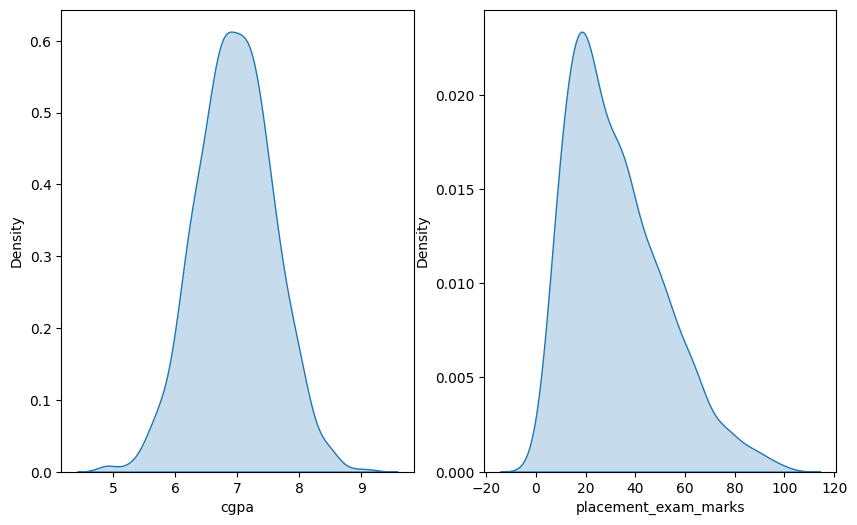

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'],fill=True)

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'],fill=True)


- placement marks is skewed data so applying iqr proximity rule on this column

In [29]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [30]:
quartile25=df['placement_exam_marks'].quantile(0.25)
quartile75=df['placement_exam_marks'].quantile(0.75)

In [33]:
print("Quartile 25:", quartile25)
print("Quartile 75:", quartile75)

Quartile 25: 17.0
Quartile 75: 44.0


In [34]:
IQR=quartile75-quartile25

In [35]:
IQR

27.0

In [36]:
upper_fence=quartile75+1.5*IQR
lower_fence=quartile25-1.5*IQR

In [37]:
print("Upper_fence:",upper_fence)
print("Lower_fence:",lower_fence)

Upper_fence: 84.5
Lower_fence: -23.5


In [38]:
#outliers 
df[df['placement_exam_marks']>upper_fence]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming 

In [39]:
df.shape

(1000, 3)

In [41]:
new_df=df[df['placement_exam_marks']<upper_fence]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


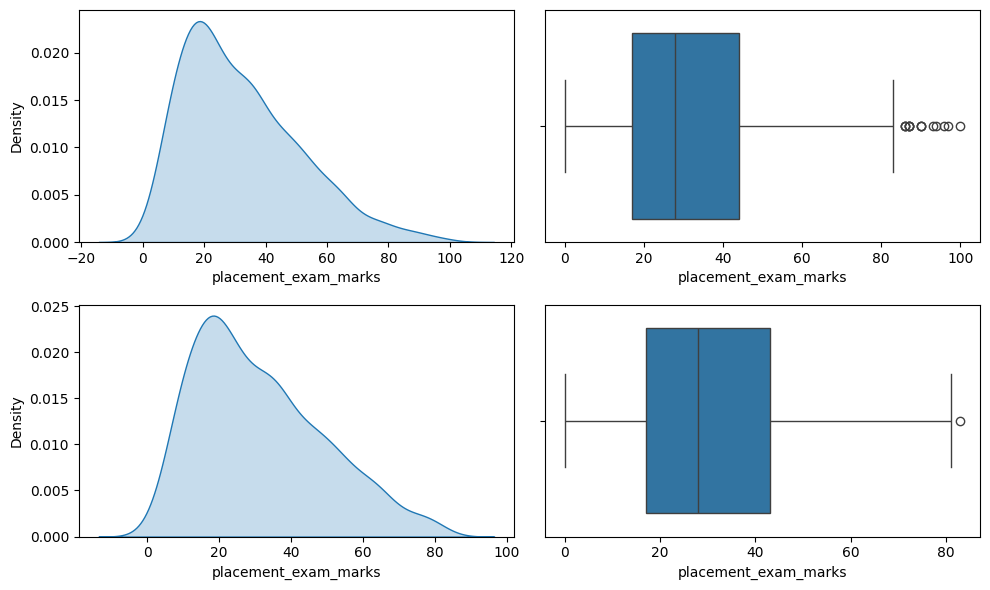

In [50]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.kdeplot(df['placement_exam_marks'], fill=True)

plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.kdeplot(new_df['placement_exam_marks'], fill=True)
plt.subplot(2, 2, 4)
sns.boxplot(x=new_df['placement_exam_marks'])
plt.tight_layout()

### Capping 

In [47]:
new_df_capped=df.copy()
new_df_capped['placement_exam_marks']=np.where((new_df_capped['placement_exam_marks']>upper_fence),upper_fence,np.where((new_df_capped['placement_exam_marks']<lower_fence),lower_fence, new_df_capped['placement_exam_marks']))

In [48]:
new_df_capped

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


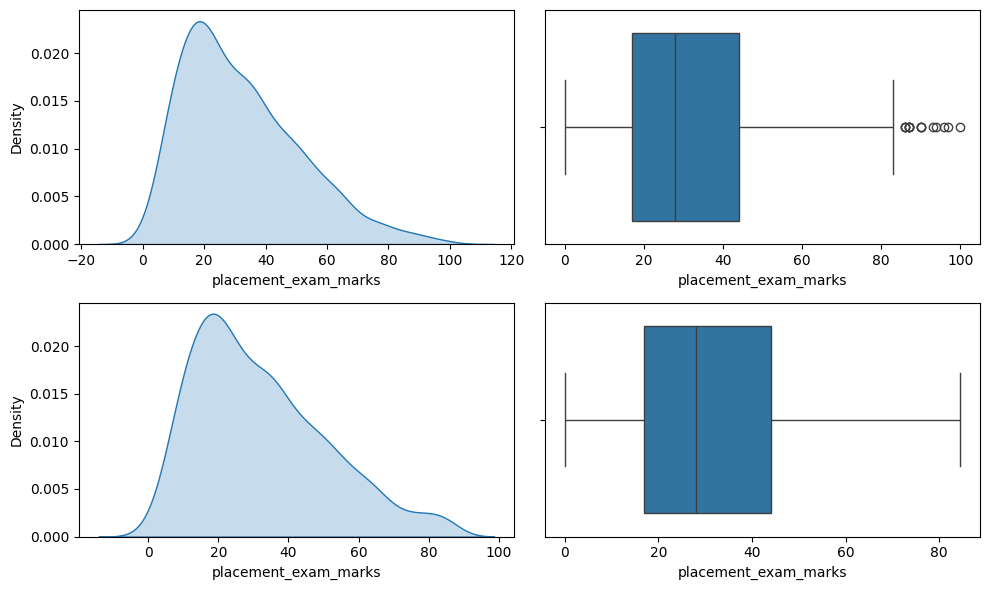

In [49]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.kdeplot(df['placement_exam_marks'], fill=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.kdeplot(new_df_capped['placement_exam_marks'], fill=True)

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_capped['placement_exam_marks'])
plt.tight_layout()

